## Limpieza y análisis de los datos ##

Prepararemos los datos para su uso y realizaremos un análisis sobre los fenómenos que ocurren en las Telecomunicaciones a nivel nacional.

Importamos las librerias necesarias.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Leemos los datasets que utilizaremos.
  
  En algunos datasets leeremos ciertas columnas como tipo de dato 'object', evitando la interpretación autómatica, para facilitar así su limpieza y uso.

In [5]:
ingresos_internet = pd.read_csv('_src/Dataset/Originales/Internet_Ingresos.csv')

cant_prov = pd.read_csv('_src/Dataset/Originales/Internet_Penetracion-por-100-hog-provincia.csv')

acceso_velocidad_prov = pd.read_csv('_src/Dataset/Originales/Acceso_Internet_Fijo_por_rangos_velocidad_bajada_y_provincia.csv', dtype=
                                    {i: 'object' for i in['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 6 Mbps - 10 Mbps','+ 10 Mbps - 20 Mbps',
                                                        '+ 20 Mbps - 30 Mbps', 'OTROS']})

acceso_tecnologia_nac = pd.read_csv('_src/Dataset/Originales/Internet_Accesos-por-tecnologia.csv')
acceso_tecnologia_prov = pd.read_csv('_src/Dataset/Originales/Acceso_Internet_fijo_por_tecnología_y_provincia.csv', dtype = {'Otros': 'object'})

velocidad_media_prov = pd.read_csv('_src/Dataset/Originales/Velocidad_media_bajada_Internet_fijo_por_provincia.csv')

Analizamos el formato de los campos y evaluamos que cambios se realizarán.

In [6]:
ingresos_internet.head(3)

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67.055.930,Jul-Sept 2022
1,2022,2,60.335.724,Abr-Jun 2022
2,2022,1,55.589.997,Ene-Mar 2022


Tomaremos las columnas ``Año`` y ``Trimestre`` para el análisis por lo que eliminaremos el campo ``Periodo`` al no proveer información relevante.

In [7]:
ingresos_internet.drop(columns='Periodo', inplace=True)

Quitaremos los puntos en los valores de la columna `Ingresos (miles de pesos)` y modificaremos el tipo de dato a `int`.

In [8]:
ingresos_internet['Ingresos (miles de pesos)'] = ingresos_internet['Ingresos (miles de pesos)'].apply(lambda x: str(x).replace('.', '')).astype(int)

Crearemos un gráfico de líneas para ver la evolución en los ingresos de internet según el paso de los años.

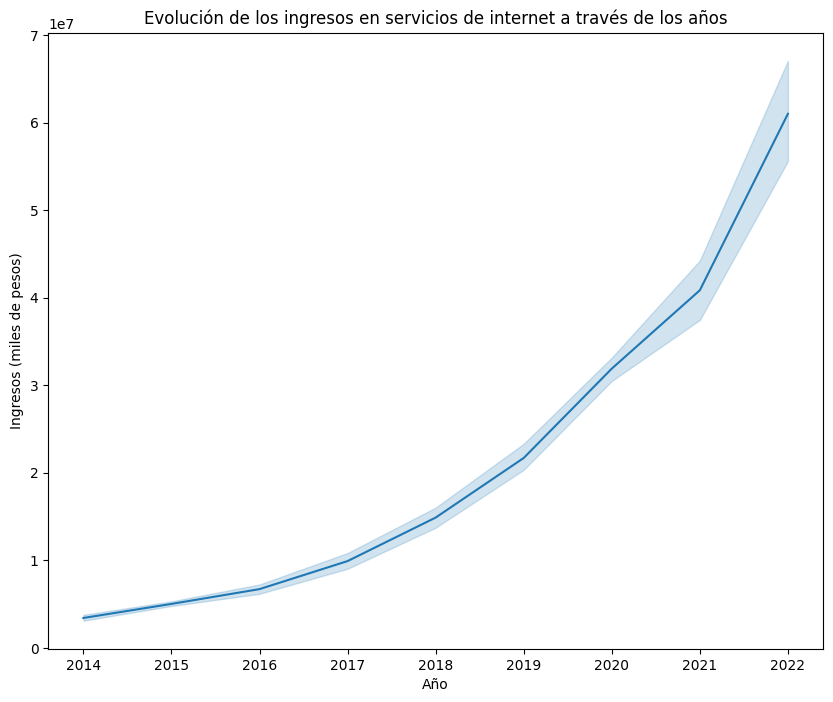

In [9]:
plt.figure(figsize=(10, 8))
sns.lineplot(x='Año', y='Ingresos (miles de pesos)', data= ingresos_internet)
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.title('Evolución de los ingresos en servicios de internet a través de los años')
plt.show()

Podemos ver que la tendencia en los ingresos es clara, notamos una subida a lo largo de los años con la popularización del uso de las comunicaciones e internet en general. Vemos además que la pendiente de crecimiento se hizo cada vez más notable, teniendo un pico en el año 2021.

    De este modo, es razonable afirmar que se debe invertir en la prestación de servicios de internet al ver un alto crecimiento y un gran potencial incluso con el desarrollo o madurez actual de este mercado.

Analizamos el formato de los campos y evaluamos que cambios se realizarán.

In [10]:
cant_prov.head(3)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,"78,11"
1,2022,3,Capital Federal,"122,28"
2,2022,3,Catamarca,"65,33"


Quitaremos los puntos en los valores de la columna `Accesos por cada 100 hogares` y modificaremos el tipo de dato a `float`.

In [11]:
cant_prov['Accesos por cada 100 hogares'] = cant_prov['Accesos por cada 100 hogares'].apply(lambda x: str(x).replace(',', '.')).astype(float)

Crearemos un gráfico de cajas para ver las distribuciones, variabilidad de los datos y diferencias entre los accessos cada 100 hogares en las distintas provincias.

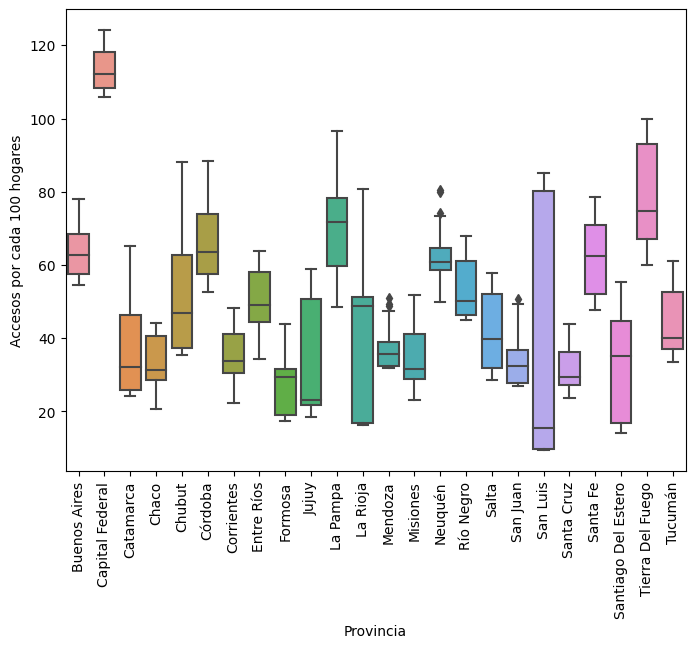

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Provincia', y='Accesos por cada 100 hogares', data= cant_prov )
plt.xticks(rotation=90)
plt.show()

Podemos observar que la media, en la mayoría de las provincias, se encuentra entre 20 y 70 accesos cada 100 hogares. Hay provincias que son líderes en el ámbito como Capital Federal, Tierra del Fuego, Buenos Aires y La Pampa mientras tenemos otras con una media considerablemente menor como Formosa, San Juan, San Luis (aunque con una gran variabilidad), Santa Cruz e incluso provincias con poblaciones más grandes como Mendoza, Salta, Corrientes y Chaco. 
  
  Con esto podemos concluir que hay condiciones óptimas para la inversión en varias provincias, debemos averiguar a qué se debe el nivel de accesso a internet, la distribución del mismo en estas zonas y el desarrollo general de las mismas, procediendo a elegir las mejores oportunidades de inversión para la empresa.

    En principio, se debe tomar las provincias que poseen mayor facilidad de ingreso al mercado determinado por una competencia no tan alta y las poblaciones más amplías posibles como es el caso de Mendoza, Salta y Corrientes. Esto nos permitirá mejorar los servicios generales de acceso a internet y el liderazgo o al menos una buena cuota de mercado en las respectivas provincias.

Traemos los 3 primeros registros para analizar el formato de los campos y evaluar que cambios se realizarán.

In [13]:
acceso_tecnologia_nac.head(3)

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,3,1.395.277,6.031.970,2.871.541,557.110,235.230,11.091.128,Jul-Sept 2022
1,2022,2,1.468.333,5.979.214,2.723.285,556.243,231.609,10.958.684,Abr-Jun 2022
2,2022,1,1.533.240,6.073.426,2.219.533,545.814,251.996,10.624.009,Ene-Mar 2022


Eliminaremos la columna ``Periodo`` ya que usaremos ``Año`` y ``Trimestre`` para el análisis.

In [14]:
acceso_tecnologia_nac.drop(columns='Periodo', inplace=True)

Por último, estandarizaremos los campos con valores númericos, para ello eliminaremos los puntos y modificaremos el tipo de dato a `int`.

In [15]:
acceso_tecnologia_nac['ADSL'] = acceso_tecnologia_nac['ADSL'].apply(lambda x: str(x).replace('.', '')).astype(int)

acceso_tecnologia_nac['Cablemodem'] = acceso_tecnologia_nac['Cablemodem'].apply(lambda x: str(x).replace('.', '')).astype(int)

acceso_tecnologia_nac['Fibra óptica'] = acceso_tecnologia_nac['Fibra óptica'].apply(lambda x: str(x).replace('.', '')).astype(int)

acceso_tecnologia_nac['Wireless'] = acceso_tecnologia_nac['Wireless'].apply(lambda x: str(x).replace('.', '')).astype(int)

acceso_tecnologia_nac['Otros'] = acceso_tecnologia_nac['Otros'].apply(lambda x: str(x).replace('.', '')).astype(int)

acceso_tecnologia_nac['Total'] = acceso_tecnologia_nac['Total'].apply(lambda x: str(x).replace('.', '')).astype(int)

Crearemos un gráfico de líneas para ver la cantidad de accesos que se tiene en cada tecnología a nivel nacional a lo largo de los años. Así podremos identificar las tendencias de cada una de las tecnologías.

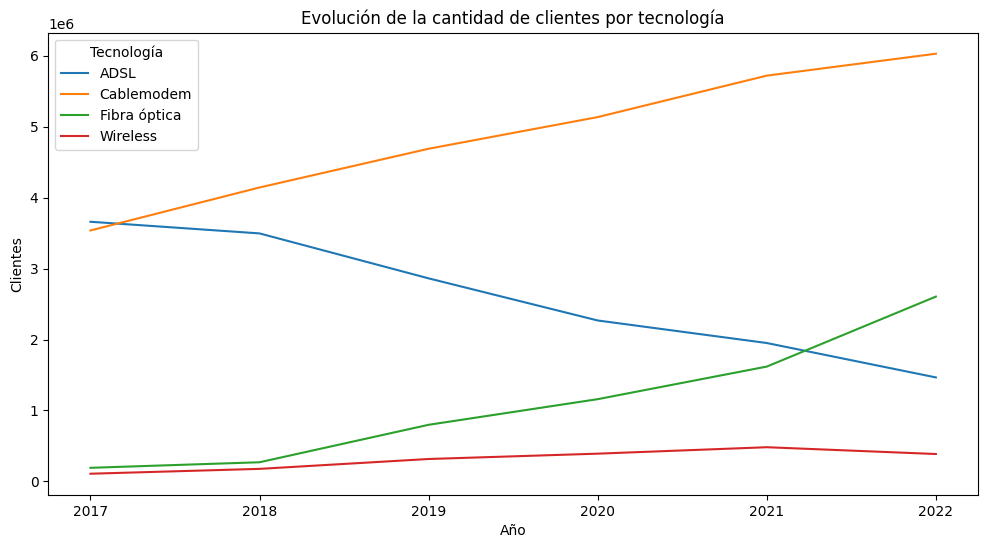

In [16]:
data = acceso_tecnologia_nac[acceso_tecnologia_nac['Año'] > 2016]
velocidades = data.columns[2: -2].values

plt.figure(figsize=(12,6))
for i in velocidades:
    sns.lineplot(data= data, x='Año', y=i,label=i,errorbar=None)
plt.xlabel('Año')
plt.ylabel('Clientes')
plt.title('Evolución de la cantidad de clientes por tecnología')
plt.legend(title= 'Tecnología')
plt.show()

Observamos que el Cablemodem tiene la mayor parte del mercado aunque en los últimos años su pendiente se ha aplanado dando a entender una baja en el crecimiento. 
  
  Por otro lado, la fibra óptica ha tenido un amplío crecimiento iniciado en el año 2018 debido a su gran velocidad y capacidad en el transporte de datos. Además, podemos ver ADSL se encuentra en obsolencencia y tiene una clara caída a partir de 2018.
  
  El Wireless no será considerado porque es una tecnología de uso inusual, por lo que genera una curva bastante constante con los años, dando a entender que es adoptada para ciertos usos puntuales pero no se tratá de una tecnología con la que se compite.

Traemos los 3 primeros registros para analizar el formato de los campos y evaluar que cambios se realizarán.

In [17]:
acceso_tecnologia_prov.head(3)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,1,Buenos Aires,392.045,2.728.865,1.242.121,125.521,66.872,4.555.424
1,2022,1,Capital Federal,102.290,1.217.225,62.308,5.784,29.934,1.417.541
2,2022,1,Catamarca,14.181,15.517,29.118,1.328,2.234,62.378


Veremos que cantidad de valores nulos posee y en que columnas se encuentran.

In [18]:
acceso_tecnologia_prov.isna().sum()

Año             0
Trimestre       0
Provincia       1
ADSL            1
Cablemodem      1
Fibra óptica    1
Wireless        1
Otros           1
Total           1
dtype: int64

Traeremos el registro con campos nulos para ver su contenido, no nos sirve como dato pero nos brinda información para el análisis. 

  Nos indica que estos datos no coinciden totalmente con los nacionales pero decidiremos quedarnos con ambos datasets ya que haremos 2 análisis distintos y ambos brindan información útil.

In [19]:
acceso_tecnologia_prov.loc[acceso_tecnologia_prov['Provincia'].isna() == True, 'Trimestre'].values

array(['Los datos provinciales no coinciden a nivel nacional, ya que se rincorporó información que no contien apertuta a nivel geográfico.'],
      dtype=object)

Eliminamos los registros con valores faltantes.

In [20]:
acceso_tecnologia_prov.dropna(inplace=True)

Vemos que los registros de 2019 tienen un error carga o formato.

In [21]:
acceso_tecnologia_prov.value_counts()

Año     Trimestre  Provincia     ADSL       Cablemodem  Fibra óptica  Wireless  Otros   Total    
2014    1          Buenos Aires  1.567.685  1.000.879   120.960       16.528    33.824  2.739.876    1
2019 *  1 *        Salta         74.426     57.933      647           1.135     1.879   136.020      1
                   San Luis      11.108     7.784       378           53.097    23.968  96.335       1
                   Santa Cruz    10.659     4.615       382           6.514     2.735   24.905       1
                   Santa Fe      340.038    340.344     15.621        23.215    17.860  737.078      1
                                                                                                    ..
2016    4          Catamarca     26.735     250         14            1         34      27.034       1
                   Chaco         54.974     33.534      248           52        39      88.847       1
                   Chubut        43.994     955         916           13.107  

In [22]:
acceso_tecnologia_prov[acceso_tecnologia_prov['Año'] == '2019 *']

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
240,2019 *,3 *,Buenos Aires,1.277.249,2.144.956,425.386,85.572,27.070,3.960.233
241,2019 *,3 *,Capital Federal,300.288,1.080.973,24.900,3.895,31.155,1.441.211
242,2019 *,3 *,Catamarca,24.349,5.543,13,244,2.251,32.400
243,2019 *,3 *,Chaco,50.416,49.156,8.063,5.224,1.592,114.451
244,2019 *,3 *,Chubut,37.298,27.090,1.917,15.149,7.551,89.005
...,...,...,...,...,...,...,...,...,...
307,2019 *,1 *,Santa Cruz,10.659,4.615,382,6.514,2.735,24.905
308,2019 *,1 *,Santa Fe,340.038,340.344,15.621,23.215,17.860,737.078
309,2019 *,1 *,Santiago Del Estero,25.337,61.547,23,2.847,99,89.853
310,2019 *,1 *,Tierra Del Fuego,19.789,23.549,1.623,- 0,1.486,46.447


Procederemos a normalizar los valores de los campos ``Año`` y ``Trimestre``.

In [23]:
acceso_tecnologia_prov['Año'] = acceso_tecnologia_prov['Año'].apply(lambda x: str(x).replace('*', '').strip()).astype(int)
acceso_tecnologia_prov['Trimestre'] = acceso_tecnologia_prov['Trimestre'].apply(lambda x: str(x).replace('*', '').strip()).astype(int)

Al traer la cantidad de veces que se repiten los valores en el campo ``Cablemodem`` podemos notar que debemos normalizar el formato de el valor 0, lo mismo ocurre con ``Fibra óptica`` y ``Wireless``.

In [24]:
acceso_tecnologia_prov['Cablemodem'].value_counts()

Cablemodem
34.984    15
451       14
- 0       14
13.030    13
3.900      7
          ..
49.711     1
69.676     1
60.970     1
37.933     1
83         1
Name: count, Length: 681, dtype: int64

Normalizamos el formato de los campos con valor 0.

In [25]:
acceso_tecnologia_prov['Cablemodem'] = acceso_tecnologia_prov['Cablemodem'].replace('- 0', '0')

acceso_tecnologia_prov['Fibra óptica'] = acceso_tecnologia_prov['Fibra óptica'].replace('- 0', '0')

acceso_tecnologia_prov['Wireless'] = acceso_tecnologia_prov['Wireless'].replace('- 0', '0')

Por último, estandarizaremos los campos con valores númericos, para ello eliminaremos los puntos y modificaremos el tipo de dato a `int`.

In [26]:

acceso_tecnologia_prov['ADSL'] = acceso_tecnologia_prov['ADSL'].apply(lambda x: str(x).replace('.', '')).astype(int)

acceso_tecnologia_prov['Cablemodem'] = acceso_tecnologia_prov['Cablemodem'].apply(lambda x: str(x).replace('.', '')).astype(int)

acceso_tecnologia_prov['Fibra óptica'] = acceso_tecnologia_prov['Fibra óptica'].apply(lambda x: str(x).replace('.', '')).astype(int)

acceso_tecnologia_prov['Wireless'] = acceso_tecnologia_prov['Wireless'].apply(lambda x: str(x).replace('.', '')).astype(int)

acceso_tecnologia_prov['Otros'] = acceso_tecnologia_prov['Otros'].apply(lambda x: str(x).replace('.', '')).astype(int)

acceso_tecnologia_prov['Total'] = acceso_tecnologia_prov['Total'].apply(lambda x: str(x).replace('.', '')).astype(int)

Crearemos un gráfico con parcelas de barras para ver la cantidad de accesos que se tiene en cada tecnología por provincia, en el último año. Así podremos identificar patrones en las tecnologías de cada provincia y características en la distribucion de las mismas.
  
  En nuestro caso, exceptuaremos provinicas con altos niveles de accesos como Buenos Aires, Capital Federal y otras para facilitar la visualización de nuestro mercado de interés, provincias con amplías poblaciones y oportunidad de ingreso.
   
  También se podría considerar, en caso de tener la capacidad como empresa, competir en los mercados con más clientes aunque ya existan competidores, mientras no existan barreras de entrada legales o económicas demasiado ampías la empresa debería poder llevarse una buena cuota de mercado si ofrece internet con tecnologías como Cablemodem o Fibra óptica que ofrecen altas velocidades.

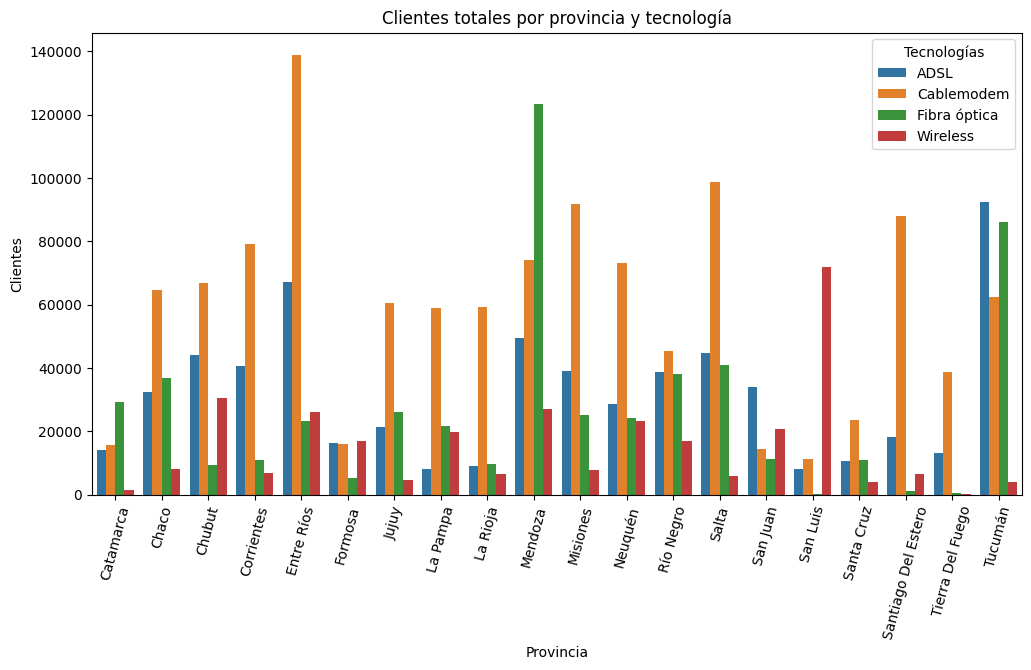

In [27]:
data = acceso_tecnologia_prov[~acceso_tecnologia_prov['Provincia'].isin(['Buenos Aires', 'Capital Federal',
                                                                           'Córdoba', 'Santa Fe'])]

data = data[data['Año'] == 2022]

data = data.drop(columns=['Total', 'Año', 'Trimestre', 'Otros'])

data = pd.melt(data, id_vars='Provincia', var_name='Tecnologías', value_name='Totales')

#Gráfico de barras con parcelas de Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Provincia', y='Totales', hue= 'Tecnologías', data=data)
plt.xlabel('Provincia')
plt.ylabel('Clientes')
plt.title('Clientes totales por provincia y tecnología')
plt.xticks(rotation=75)
plt.legend(title='Tecnologías')

plt.show()


Podemos ver que hay provincias con muchos clientes en tecnologías de ADSL que ofrecen baja velocidad y se encuentran prácticamente obsoletas. Un factor que podría influir en el fenómeno es la falta de conocimiento respecto a las tecnologías y sus velocidades o la falta de desarrollo en las distintas zonas analizadas.

    Así notamos que, es oportuno prácticamente en todas las provincias, de ser posible, invertir en fibra óptica debido a su bajo desarrollo a nivel nacional. También, observamos que Tucumán, Corrientes, Entre Ríos, Mendoza, Salta y otras provincias cuentan con amplías poblaciones y un alto uso de ADSL. Es así que detectamos una oportunidad de ingreso al mercado ofreciendo Cablemodem para reemplazar esta tecnología.

Analizamos el formato de los campos y evaluamos que cambios se realizarán.

In [28]:
acceso_velocidad_prov.head(3)

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,1,Buenos Aires,31.591,30.056,313.382,321.756,290.127,161.183,3.381.049,26.280,4.555.424
1,2022,1,Capital Federal,527,5.575,39.918,77.390,61.053,43.289,1.188.072,1.717,1.417.541
2,2022,1,Catamarca,71,456,4.386,7.009,8.773,3.761,35.715,2.207,62.378


Veremos que cantidad de valores nulos posee y en que columnas se encuentran.

In [29]:
acceso_velocidad_prov.isna().sum()

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64

Evaluaremos como 0 los datos faltantes de la columna ``OTROS``.

In [30]:
acceso_velocidad_prov['OTROS'] = acceso_velocidad_prov['OTROS'].apply(lambda x: x if pd.notna(x) else 0)

Para estandarizar los campos con valores númericos eliminaremos los puntos y modificaremos el tipo de dato a `int`.

In [31]:

acceso_velocidad_prov['HASTA 512 kbps'] = acceso_velocidad_prov['HASTA 512 kbps'].apply(lambda x: str(x).replace('.', '')).astype(int)

acceso_velocidad_prov['+ 512 Kbps - 1 Mbps'] = acceso_velocidad_prov['+ 512 Kbps - 1 Mbps'].apply(lambda x: str(x).replace('.', '')).astype(int)

acceso_velocidad_prov['+ 1 Mbps - 6 Mbps'] = acceso_velocidad_prov['+ 1 Mbps - 6 Mbps'].apply(lambda x: str(x).replace('.', '')).astype(int)

acceso_velocidad_prov['+ 6 Mbps - 10 Mbps'] = acceso_velocidad_prov['+ 6 Mbps - 10 Mbps'].apply(lambda x: str(x).replace('.', '')).astype(int)

acceso_velocidad_prov['+ 10 Mbps - 20 Mbps'] = acceso_velocidad_prov['+ 10 Mbps - 20 Mbps'].apply(lambda x: str(x).replace('.', '')).astype(int)

acceso_velocidad_prov['+ 20 Mbps - 30 Mbps'] = acceso_velocidad_prov['+ 20 Mbps - 30 Mbps'].apply(lambda x: str(x).replace('.', '')).astype(int)

acceso_velocidad_prov['+ 30 Mbps'] = acceso_velocidad_prov['+ 30 Mbps'].apply(lambda x: str(x).replace('.', '')).astype(int)

acceso_velocidad_prov['OTROS'] = acceso_velocidad_prov['OTROS'].apply(lambda x: str(x).replace('.', '')).astype(int)

acceso_velocidad_prov['Total'] = acceso_velocidad_prov['Total'].apply(lambda x: str(x).replace('.', '')).astype(int)

Realizaremos un gráfico de líneas para ver las tendencias de las distintas velocidades a nivel nacional, buscando tendencias y conclusiones sobre la velocidades óptimas a ofrecer en el servicio.

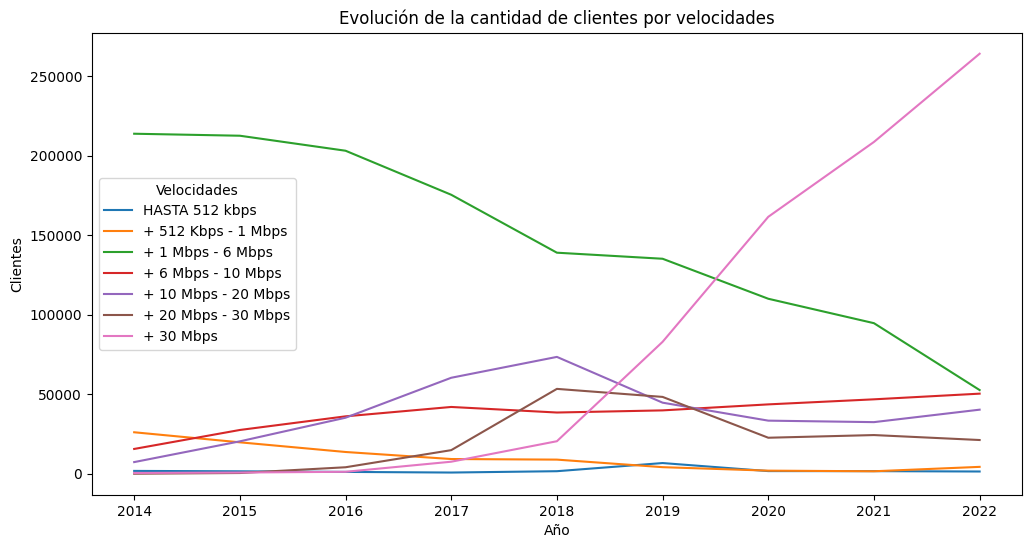

In [32]:
velocidades = acceso_velocidad_prov.columns[3: -2].values

plt.figure(figsize=(12,6))
for i in velocidades:
    sns.lineplot(data= acceso_velocidad_prov, x='Año', y=i,label=i,errorbar=None)
plt.xlabel('Año')
plt.ylabel('Clientes')
plt.title('Evolución de la cantidad de clientes por velocidades')
plt.legend(title= 'Velocidades')
plt.show()

Podemos notar que la mayoría de velocidades tuvieron un pico en 2018-2019 y en adelante tendieron mayormente a caer o mantenerse salvo la velocidad +30 Mbps que empezó a crecer rápidamente y lo sigue haciendo actualmente.

        Vemos que el único caso óptimo de ingreso en el mercado es ofrecer velocidades de +30 Mbps, viéndose obsoletas todas las que se encuentren por debajo de este rango. Además, podemos decir que cualquier provinica que tenga una media de entre 20 y 40 Mbps es una clara oportunidad para la empresa, ya que la tendencia general es el uso de velocidades iguales o superiores a este rango.

Traemos los 3 primeros registros para analizar el formato de los campos y evaluar que cambios se realizarán.

In [33]:
velocidad_media_prov.head(3)

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,1,Buenos Aires,63
1,2022,1,Capital Federal,88
2,2022,1,Catamarca,51


Buscaremos campos con valores faltantes en las distintas columnas.

In [34]:
velocidad_media_prov.isna().sum()

Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

Al no ver problemas en los datos procederemos a hacer el análisis.

Crearemos un gráfico de barras para ver la velocidad media de cada provincia en el último año. Así podremos identificar la situación actual en la velocidad de cada provincia.

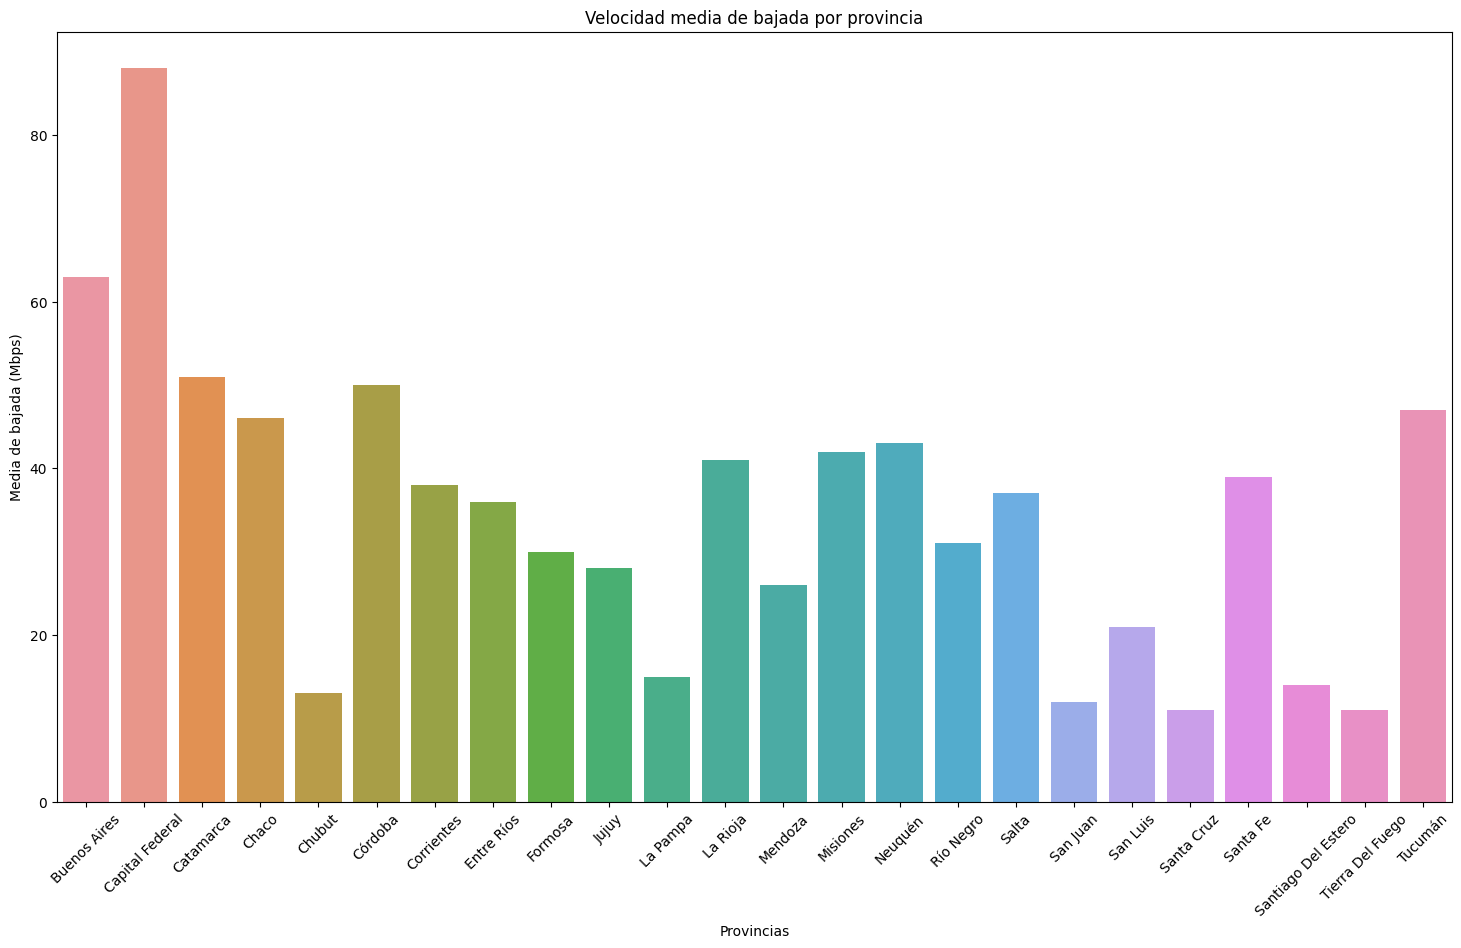

In [35]:
plt.figure(figsize=(18, 10))
sns.barplot(x='Provincia', y='Mbps (Media de bajada)', data=velocidad_media_prov[velocidad_media_prov['Año'] == 2022])
plt.xlabel('Provincias')
plt.ylabel('Media de bajada (Mbps)')
plt.title('Velocidad media de bajada por provincia')
plt.xticks(rotation=45)

plt.show()

Podemos concluir que existen una gran variación de la velocidad entre las diferentes provincias que se presentan, observando provincias muy desarrolladas con velocidades altas y una posibilidad baja de ingreso inmediato al mercado para nuestra empresa. Por otro lado, vemos que la media de velocidad en la mayoría de las provincias no es muy alta (media general de 34 Mbps) y las más bajas rondan los 10 Mbps.

    Es así que detectamos una oportunidad de negocio al ofrecer servicios con velocidades mayores a +45 Mbps pudiendo ingresar en distintas provincias, y centrándonos en aquellas con mayores poblaciones y velocidades bajas como podría ser Mendoza, Salta y Corrientes.

Exportamos los datasets modificados para su posterior uso en el proyecto

In [36]:
ingresos_internet.to_csv('_src/Dataset/Modificados/Internet_Ingresos.csv', index = False)

cant_prov.to_csv('_src/Dataset/Modificados/Internet_Penetracion-por-100-hog-provincia.csv', index = False)

acceso_velocidad_prov.to_csv('_src/Dataset/Modificados/Acceso_Internet_Fijo_por_rangos_velocidad_bajada_y_provincia.csv', index = False)

acceso_tecnologia_nac.to_csv('_src/Dataset/Modificados/Serie_trimestral_accesos_Internet_fijo_por_tecnología.csv', index = False)

acceso_tecnologia_prov.to_csv('_src/Dataset/Modificados/Acceso_Internet_fijo_por_tecnología_y_provincia.csv', index = False)

velocidad_media_prov.to_csv('_src/Dataset/Modificados/Velocidad_media_bajada_Internet_fijo_por_provincia.csv', index = False)

A partir del análisis realizado, generaremos 3 ``KPI (Key Performance Indicator)``:

1- Aumentar en un 9% el accesso cada 100 hogares a nivel nacional en el próximo año.

  2- Aumentar la velocidad en Mbps un 15% a nivel nacional en el próximo año.

  3- Aumentar la cantidad de clientes de fibra óptica en un 65% y 10% en Cablemodem a nivel nacional en el período de un año, quitando cuota de mercado a tecnologías obsoletas como ADSL.